# Redes Neuronales: Práctico 2

Considerá el modelo Integrate-and-Fire para la evolución temporal del potencial de membrana $V_m(t)$ al tiempo t entre el interior y el exterior de una neurona genérica:

$$
\tau_m \frac{dV_m(t)}{dt} = E_L - V_m(t) + R_m I_e(t),
$$

donde $E_L$ es el potencial en reposo, $I_e(t)$ es una corriente eléctrica externa (cuyo valor positivo corresponde
a una corriente entrante) que se inyecta (input), $R_m$ es la resistencia y $\tau_m$ es el tiempo característico
de la membrana $\tau_m = r_m c_m$ (donde $r_m$ y $c_m$ son respectivamente la resistencia y la capacitancia de la
membrana por unidad de área). Esta ecuación se puede reescribir como:

$$
\frac{dV_m(t)}{dt} = \frac{1}{\tau_m} (E_L - V_m(t) + R_m I_e(t))
$$


## Ejercicio A

Resolvé analíticamente esta ecuación sin incorporar el umbral de disparo para el caso de una corriente
externa constante $I_e(t) = I_e$ y $V_m(t = 0) = V_0$. Graficá la solución para 0 ms ≤ t ≤ 200 ms con los
siguientes valores de los parámetros:

$$
V_m(t=0) = E_L = -65mV, \hspace{5pt} R=10M\Omega, \hspace{5pt} V_{th} = -50mV, \hspace{5pt} \tau_m = 10ms.
$$

Discutí e interpretá.

Para este ejercicio y olvidándonos por un momento de la variable del tiempo, podemos expresar a nuestra ecuación así:

$$
V' = \frac{1}{\tau_m} (E_L - V + R_m I_e)
$$

Teniendo en cuenta que $E_L$, $R_m$ e $I_e$ en este caso son constantes, lo único que debemos hacer es un pequeño cambio de variables.

$$
U = V - E_L - R_m I_e
$$

Así, al reemplazar tenemos:

$$
V' = U' = \frac{-1}{\tau_m} U
$$

Esto nos lleva a tener la siguiente fórmula:

$$
\frac{U'}{U} = log(U)' = \frac{-1}{\tau_m}
$$

Y luego, tomando antiderivada a ambos lados, obtenemos

$$
log(U(t)) = \frac{-t}{\tau_m} + C \implies U(t) = e^{\frac{-t}{\tau_m} + C}
$$

Reemplazando al final, tenemos nuestra solución analítica:

$$
V(t) = C e^{\frac{-t}{\tau_m}} + E_L + R_m I_e
$$

Para terminar de encontrar nuestra constante C, debemos resolver el problema con el punto inicial $V(0) = E_L$, por lo que nos queda $C = -R_mI_e$ y finalmente:

$$
\huge{V(t) = (-R_mI_e) e^{\frac{-t}{\tau_m}} + E_L + R_m I_e = R_m I_e (1 - e^{\frac{-t}{\tau_m}}) + E_L}
$$

Vamos a graficar nuestra función basados en los datos:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

Text(0, 0.5, 'Solución Analítica')

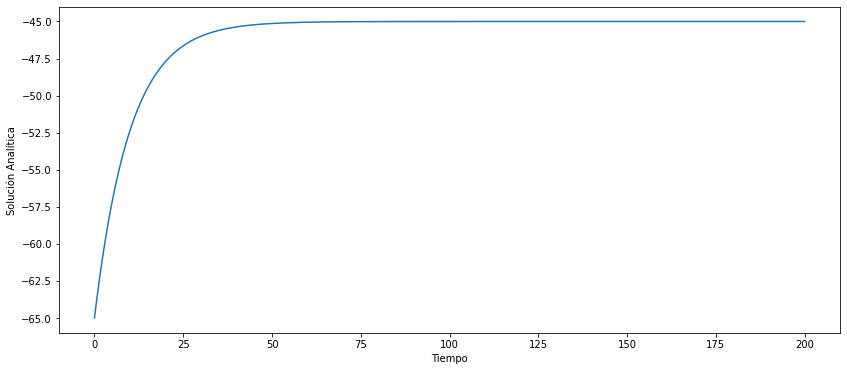

In [35]:
time = np.linspace(0.0, 200.0, 20000)
e_l = -65.0
R = 10.0
tau = 10.0
v_th = -50.0

# Elijamos I_e = 2.0

plt.figure(figsize=(14,6))
y = (R * 2.0) * (1 - np.exp(np.divide(-time, tau))) + e_l
plt.plot(time, y)
plt.xlabel("Tiempo")
plt.ylabel("Solución Analítica")

Dependiendo de la corriente externa (que en este caso es constante), vamos a tener un comportamiento exponencial negativo, por lo que nos estaremos dirigiendo asintóticamente a un valor a lo largo del tiempo. Esto ocurre porque no tenemos en este caso un umbral de disparo que nos haga recomenzar con nuestro cálculo.

## Ejercicio B

Usá el método de Runge Kutta de cuarto orden para resolver el problema de valor inicial del modelo Integrate-and-Fire.

$$
\frac{dV_m(t)}{dt} = \frac{1}{\tau_m} (E_L - V_m(t) + R_m I_e(t)) \hspace{5pt} con \hspace{5pt} V(t = 0) = E_l, \hspace{5pt} 0ms \le t \le 200ms, \hspace{5pt} y \hspace{5pt} h = 0.05ms
$$

donde h es el paso de integración y los parámetros toman los valores usados en el punto a). Tené presente
que ahora **debés agregar** en la simulación el umbral de disparo propio del modelo Integrate-and-Fire.
O sea, si $V_m(t)$ ultrapasa el valor umbral $V_{th}$, debés restituir el valor de $V_m(t)$ a $E_L$. La corriente externa
$I_e(t)$ debe ser constante y tomar el valor $I_e = 2 nA$. Graficá la aproximación numérica de $V_m(t)$ superpuesta con la solución analítica del punto **a)** (que no tenía disparos) de $V_m(t)$ 0 ms ≤ t ≤ 200 ms.


In [30]:
i_e = 2
def V(u,t):
    return 1/tau * (e_l - u + R * i_e)

def rk4(f, u0, t0, tf , n):
    t = np.linspace(t0, tf, n + 1)
    u = np.array((n + 1) * [u0])
    h = t[1] - t[0]
    for i in range(n):
        k1 = h * f(u[i], t[i])    
        k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5*h)
        k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5*h)
        k4 = h * f(u[i] + k3, t[i] + h)
        value = u[i] + (k1 + 2*(k2 + k3 ) + k4) / 6
        if value > v_th:
            value = e_l
        u[i+1] = value
    return u, t

In [31]:
u, t = rk4(V, e_l, 0.0, 200.0, int(200/0.05))

Text(0.5, 1.0, 'Solución sin umbral vs. disparos por umbral')

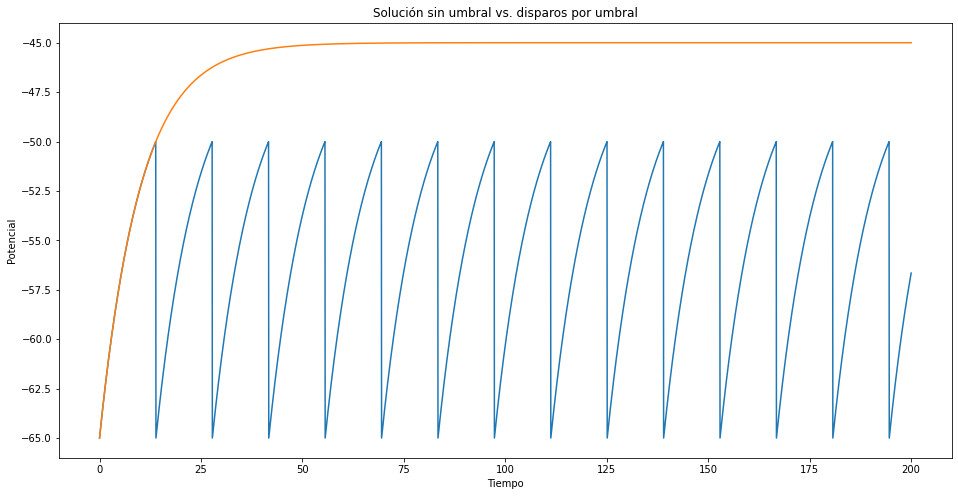

In [37]:
plt.figure(figsize=(16, 8))
plt.plot(t, u, time, y)
plt.xlabel("Tiempo")
plt.ylabel("Potencial")
plt.title("Solución sin umbral vs. disparos por umbral")

## Ejercicio C

Ahora variá los valores de $I_e$ entre 0 y 6 y calculá para cada valor la frecuencia de disparo. Graficá
la frecuencia de disparo ω vs. Ie (recordá la relación entre frecuencia y período). Intentá resolver esta
ecuación $\omega(I_e)$ analíticamente (no es obligatorio esto).

Podemos intentar encontrar el primer momento de disparo $T$ para el cual:

$$
\huge{V(T) = R_m I_e (1 - e^{\frac{-T}{\tau_m}}) + E_L = V_{th}}
$$

Por lo tanto tenemos:

$$
\huge{T(I_e) = -\tau_m log(1-\frac{V_{th}-E_l}{R_m I_e}) }
$$

Debemos invertir este número para conseguir la frecuencia de disparo y poder graficar

/home/lbiedma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/lbiedma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 1.0, 'Frecuencia de Disparo vs. I_e')

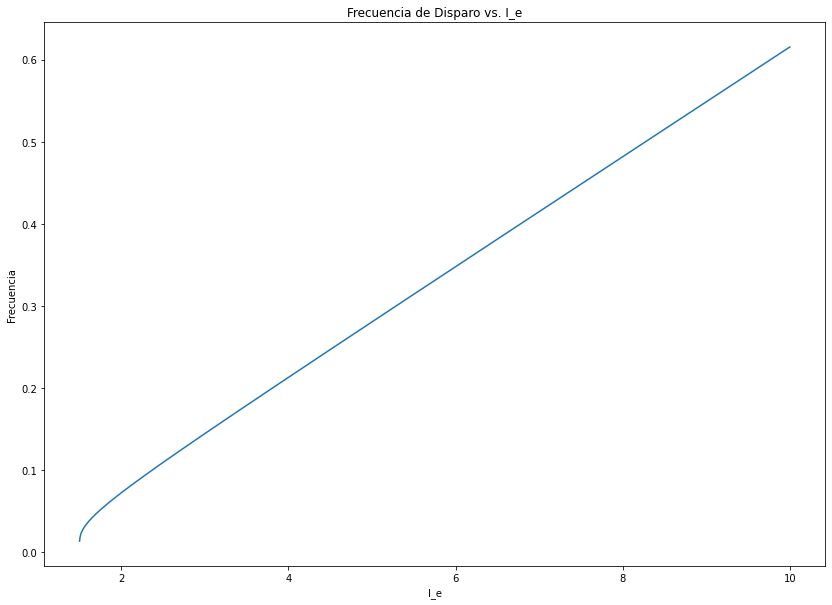

In [64]:
def freq(current):
    return -1.0 / (tau * np.log(1.0 - (v_th - e_l) / (R * current)))
# Calculamos muchas frecuencias
currents = np.linspace(0, 10, 2000)
freqs = []
for curr in currents:
    freqs.append(freq(curr))
plt.figure(figsize=(14,10))
plt.plot(currents, freqs)
plt.xlabel("I_e")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Disparo vs. I_e")

Vamos a tener errores de operaciones porque, si $I_e$ es muy pequeño, no vamos a poder generar suficiente potencial para hacer que la neurona dispare, pero se puede ver un ligero comportamiento de logaritmo al comienzo. A medida que $I_e$ crece, la neurona dispara más seguido.

## Ejercicios Opcionales

opción 1: Repetí el punto b) pero ahora con una corriente externa dependiente del tiempo que en
cada paso del método Runge Kutta de cuarto orden elige el valor con una distribución de probabilidades
uniforme entre 0 nA y 5 nA.

Necesitamos definir la nueva función de derivada para aplicar Runge-Kutta:

Text(0.5, 1.0, 'I_e con distribución uniforme entre 0 nA y 5 nA')

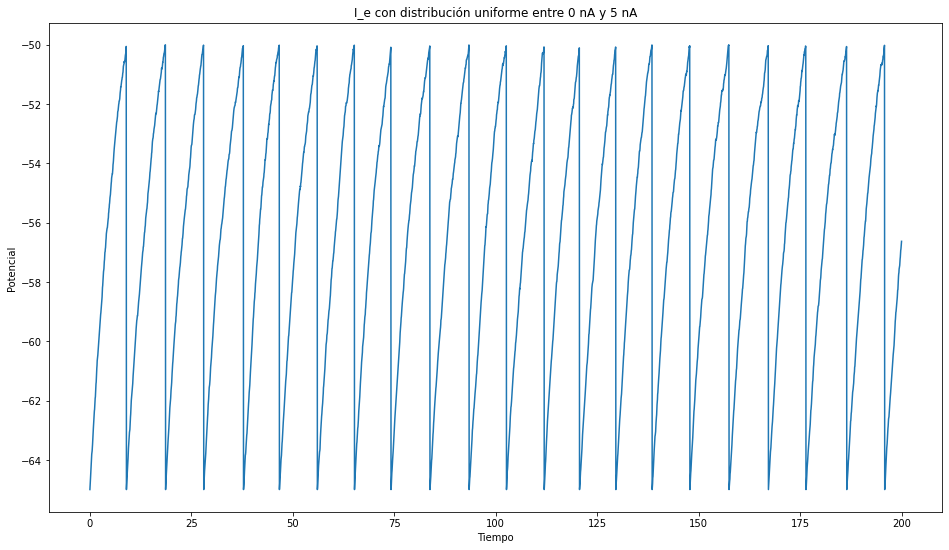

In [74]:
def V_uniform(u, t):
    return 1/tau * (e_l - u + R * np.random.uniform(0, 5))

u, t = rk4(V_uniform, e_l, 0.0, 200.0, int(200/0.05))
plt.figure(figsize=(16,9))
plt.plot(t, u)
plt.xlabel("Tiempo")
plt.ylabel("Potencial")
plt.title("I_e con distribución uniforme entre 0 nA y 5 nA")

opción 2: Repetí el punto b) pero ahora con una corriente externa dependiente del tiempo t de la
forma:

$$
I_e(t) = 0.35 \left( cos(t/3) + sen(t/5) + cos(t/7) + sen(t/11) + cos(t/13)  \right)^2 nA
$$

Text(0.5, 1.0, 'I_e con distribución de onda')

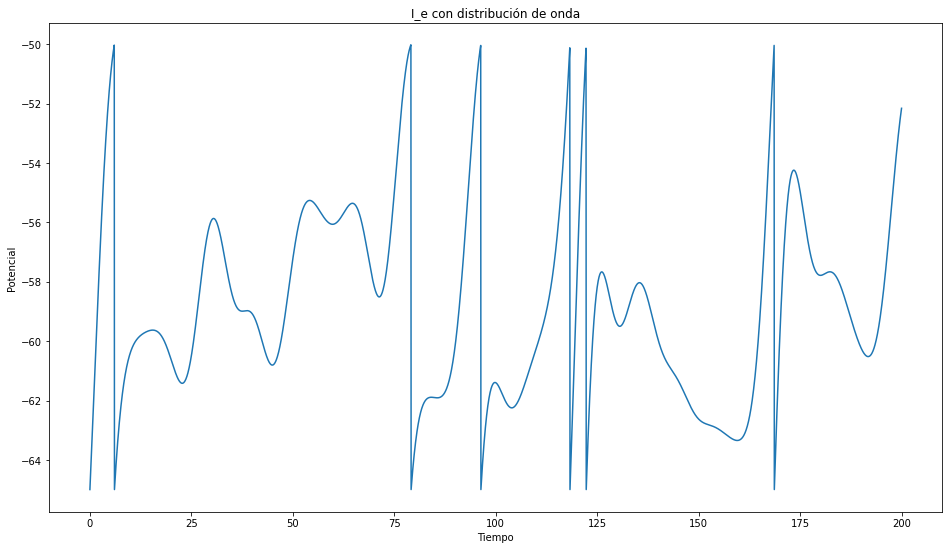

In [77]:
def V_wave(u, t):
    return 1/tau * (e_l - u + R * (0.35 * (np.cos(t/3) + np.sin(t/5) + np.cos(t/7) + np.sin(t/11) + np.cos(t/13) )**2))

u, t = rk4(V_wave, e_l, 0.0, 200.0, int(200/0.05))
plt.figure(figsize=(16,9))
plt.plot(t, u)
plt.xlabel("Tiempo")
plt.ylabel("Potencial")
plt.title("I_e con distribución de onda")